In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/titanic data set/test.csv')
train_data = pd.read_csv('/content/drive/MyDrive/titanic data set/train.csv')

In [ ]:
train_data.shape

(891, 12)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Drop Cabin Column

In [ ]:
train_data.drop(['Cabin','Embarked'],axis=1,inplace=True)

In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data.isnull().sum()/train_data.shape[0]*100

PassengerId     0.00000
Survived        0.00000
Pclass          0.00000
Name            0.00000
Sex             0.00000
Age            19.86532
SibSp           0.00000
Parch           0.00000
Ticket          0.00000
Fare            0.00000
dtype: float64

In [ ]:
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)


In [ ]:
train_data.isnull().sum()/train_data.shape[0]*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
dtype: float64

In [ ]:
(train_data.isnull().sum().sum()/(train_data.shape[0]*train_data.shape[1]))*100

0.0

In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Age'>

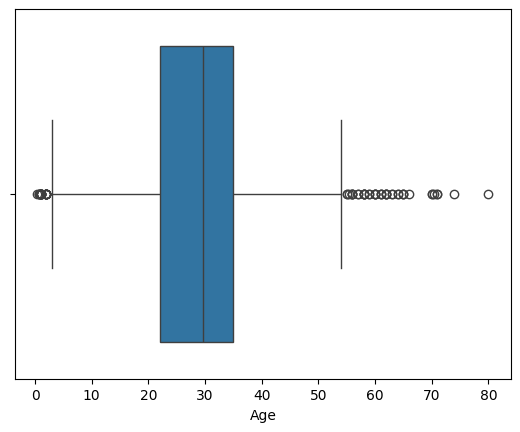

In [ ]:
sns.boxplot(x='Age',data=train_data)

In [ ]:
q1=train_data['Age'].quantile(0.25)
q1

22.0

In [ ]:
q3=train_data['Age'].quantile(0.75)
q3

35.0

In [ ]:
iqr=q3-q1
iqr

13.0

In [ ]:
min=q1-(1.5*iqr)
min

2.5

In [ ]:
max=q3+(1.5*iqr)
max

54.5

In [ ]:
new_train=train_data[train_data['Age']<=max]

In [ ]:
new_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


In [ ]:
new_train.shape,train_data.shape

((849, 10), (891, 10))

In [ ]:
train_data.shape[0]-new_train.shape[0]


42

In [ ]:
sns.boxplot(x='',data=new_train)

<Axes: xlabel='Age'>

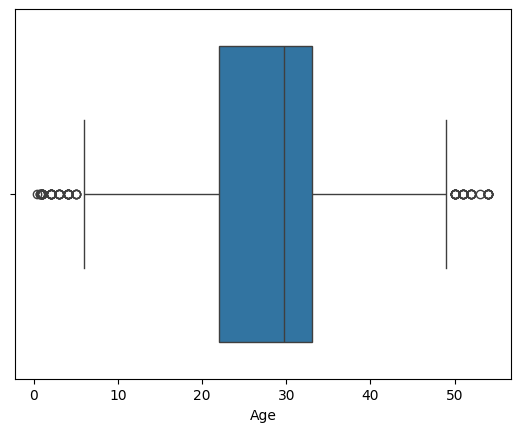

In [ ]:
sns.boxplot(x='Age',data=new_train)

In [ ]:
new_train['Sex'] = new_train['Sex'].map({'male': 0, 'female': 1})

<ipython-input-149-58a67d546c52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['Sex'] = new_train['Sex'].map({'male': 0, 'female': 1})


In [ ]:
new_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500


In [ ]:
x_train = new_train[['Pclass','Age','Sex']]
y_train = new_train['Survived']

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
accuracy = dt.score(x_train,y_train)
print(accuracy)

0.8763250883392226
